<a href="https://www.kaggle.com/code/soggyansh/is-it-hawking?scriptVersionId=129034601" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Installing Libraries

In [4]:
!pip install -Uqq fastai duckduckgo_search

## Collecting Image data using DuckDuckGo

Making a function to search images using DuckDuckGo's API

In [5]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=300):
    print(f"searching for '{term}'")
    return L(ddg_images(term, max_results = max_images)).itemgot('image')

In [6]:
urls = search_images('eagle bird photos', max_images=1)
urls[0]

searching for 'eagle bird photos'


'https://raptor.umn.edu/sites/raptor.umn.edu/files/2020-03/Bald%20eagle%20-%20Adult.jpg'

Downloading sample images for both an eagle and a hawk

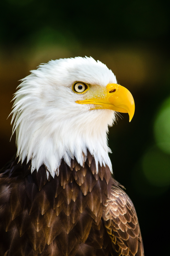

In [7]:
from fastdownload import download_url
dest = 'eagle.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

searching for 'hawk bird photos'


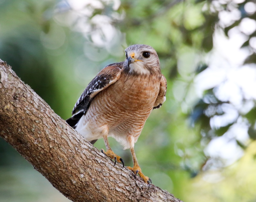

In [8]:
download_url(search_images('hawk bird photos', max_images=1)[0], 'hawk.jpg', show_progress=False)
Image.open('hawk.jpg').to_thumb(256,256)

Downloading all images and creating the dataset

In [ ]:
searches = 'eagle','hawk'
path = Path('eagle_or_hawk')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} bird photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} bird in sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} bird in shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

searching for 'eagle bird photo'
searching for 'eagle bird in sun photo'


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

## Data Augmentation and Validation Set Split

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

## ResNet18 Architecture

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(9)

## Testing the Model

In [ ]:
is_eagle,_,probs = learn.predict('hawk.jpg')
print(f"This is: {is_eagle}.")
print(f"Probability it's an eagle: {probs[0]:.4f}")